In [1]:
import numpy as np
import pandas as pd

import utils

import matplotlib
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iid-results-010922.csv', index_col=0)
data_df = pd.read_csv('data/ptm_idr.csv')
N = len(data_df)
df

,ptm,n,estimator,mu1-lower,mu1-upper,mu1-coverage,mu1-width,mu0-lower,mu0-upper,mu0-coverage,mu0-width,o-lower,o-upper,o-coverage,o-width
0,p,200,prediction-powered,0.201358,0.311358,True,0.110,0.053398,0.191398,True,0.138,1.065154,8.015017,True,6.949863
1,p,200,classical,0.141000,0.353000,True,0.212,0.056000,0.243000,True,0.187,0.511347,9.197174,True,8.685827
2,p,200,prediction-powered,0.185358,0.293358,True,0.108,0.041398,0.161398,True,0.120,1.182225,9.612842,True,8.430617
3,p,200,classical,0.152000,0.368000,True,0.216,0.016000,0.139000,True,0.123,1.110289,35.810127,True,34.699837
4,p,200,prediction-powered,0.181358,0.279358,True,0.098,0.035398,0.155398,True,0.120,1.204057,10.563418,True,9.359361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,ub_reg,10801,classical,0.340000,0.649000,True,0.309,0.166000,0.182000,True,0.016,2.315351,9.289569,True,6.974217
119996,ub_reg,10801,prediction-powered,0.402039,0.598039,True,0.196,0.171888,0.179888,True,0.008,3.065247,7.167840,True,4.102593
119997,ub_reg,10801,classical,0.332000,0.604000,True,0.272,0.167000,0.182000,True,0.015,2.233796,7.607996,True,5.374200
119998,ub_reg,10801,prediction-powered,0.398039,0.590039,True,0.192,0.173888,0.179888,True,0.006,3.014584,6.837647,True,3.823063


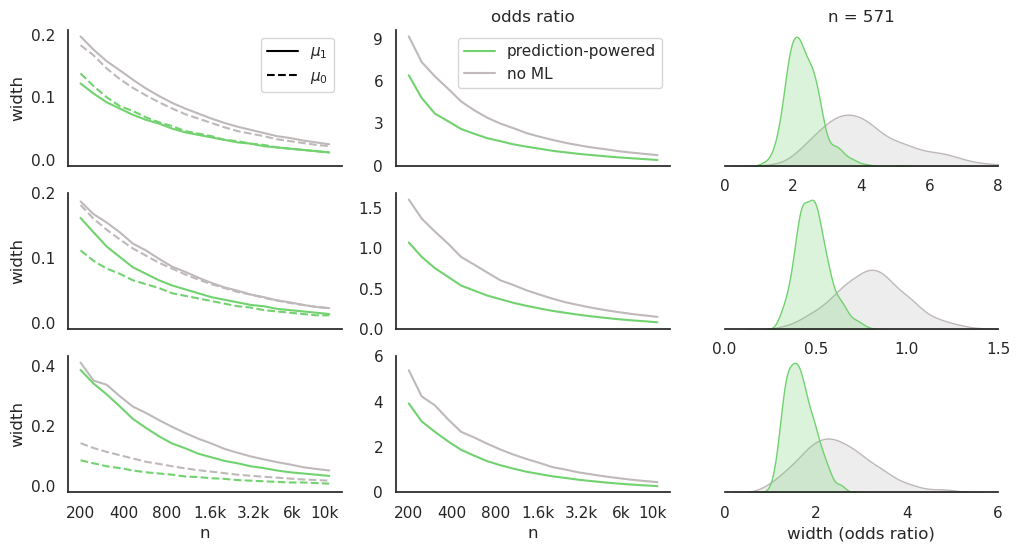

In [28]:
save = True

my_palette = sns.color_palette(["#71D26F", "#BFB9B9",], 2)
sns.set_theme(style="white", palette=my_palette)

ns = np.logspace(np.log10(200), np.log10(N), num=20, base=10).astype(int)
n_hist = ns[5]
ptm_names = ['p', 'ub', 'ac']
fig, axs = plt.subplots(len(ptm_names), 3, figsize=(12, len(ptm_names) * 2))

ns_xticks = [200, 400, 800, 1600, 3200, 6000, 10000]
ns_xticklabels = [200, 400, 800, '1.6k', '3.2k', '6k', '10k']

hist_xlims = [[0, 8], [0, 1.5], [0, 6]]
hist_xticks = [np.arange(0, 9, 2), np.arange(0, 1.6, 0.5), np.arange(0, 7, 2)]

for p_idx, ptm in enumerate(ptm_names):
    
    # ===== left subplots =====
    
    pp_df = df.loc[(df.ptm == ptm) & (df.estimator == 'prediction-powered')]
    cl_df = df.loc[(df.ptm == ptm) & (df.estimator == 'classical')]
    
    # mu1
    wcl_n = np.array([cl_df.loc[cl_df.n == n]['mu1-width'].median()for n in ns])
    wpp_n = np.array([pp_df.loc[pp_df.n == n]['mu1-width'].median()for n in ns])
    axs[p_idx, 0].plot(ns, wpp_n)
    axs[p_idx, 0].plot(ns, wcl_n)
    
    # mu0
    wcl_n = np.array([cl_df.loc[cl_df.n == n]['mu0-width'].median()for n in ns])
    wpp_n = np.array([pp_df.loc[pp_df.n == n]['mu0-width'].median()for n in ns])
    axs[p_idx, 0].plot(ns, wpp_n, c=my_palette[0], linestyle='--')     
    axs[p_idx, 0].plot(ns, wcl_n, c=my_palette[1], linestyle='--')
    
    axs[p_idx, 0].set_xscale('log');
    axs[p_idx, 0].set_xticks([])
    axs[p_idx, 0].set_ylabel('width');
    sns.despine(ax=axs[p_idx, 0], top=True, right=True)
    
    axs[p_idx, 0].plot([0, 0], [0, 0], linestyle='-', c='k', label='$\mu_1$')
    axs[p_idx, 0].plot([0, 0], [0, 0], linestyle='--', c='k', label='$\mu_0$')
    
    # ===== middle subplots =====
    
    # odds ratio
    wcl_n = np.array([cl_df.loc[cl_df.n == n]['o-width'].median()for n in ns])
    wpp_n = np.array([pp_df.loc[pp_df.n == n]['o-width'].median()for n in ns])
    axs[p_idx, 1].plot(ns, wpp_n, label='prediction-powered')
    axs[p_idx, 1].plot(ns, wcl_n, label='no ML')
    
    sns.despine(ax=axs[p_idx, 1], top=True, right=True)
    axs[p_idx, 1].set_xscale('log');
    axs[p_idx, 1].set_xticks([])
    
    # ===== right subplots
    
    hist_df = df.loc[(df.ptm == ptm) & (df.n == n_hist)]
    kde = sns.kdeplot(data=hist_df, x='o-width', hue='estimator', ax=axs[p_idx, 2], fill=True);
    sns.despine(ax=axs[p_idx, 2], top=True, right=True, left=True)
    axs[p_idx, 2].set_yticks([])
    axs[p_idx, 2].set_ylabel('')
    axs[p_idx, 2].set_xlim(hist_xlims[p_idx])
    axs[p_idx, 2].set_xticks(hist_xticks[p_idx])
    axs[p_idx, 2].set_xlabel('width (odds ratio)')
    kde.get_legend().remove()
    
for i in [0, 1]:
    axs[-1, i].set_xticks(ns_xticks)
    axs[-1, i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[-1, i].set_xticklabels(ns_xticklabels)
    axs[-1, i].set_xlabel('n');
    axs[0, i].legend();
    axs[0, i].legend();
axs[0, 0].set_yticks([0, 0.1, 0.2])
axs[1, 0].set_yticks([0, 0.1, 0.2])
axs[2, 0].set_yticks([0, 0.2, 0.4])
axs[0, 1].set_yticks(np.arange(0, 10, 3))
axs[1, 1].set_yticks(np.arange(0, 1.7, 0.5))
axs[2, 1].set_yticks(np.arange(0, 7, 2))
axs[0, 1].set_title('odds ratio');
axs[0, 2].set_title('n = {}'.format(n_hist));

if save:
    plt.savefig('./figures/widths.pdf', dpi=300, bbox_inches='tight')
plt.show()

## plot one example set of intervals

/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6


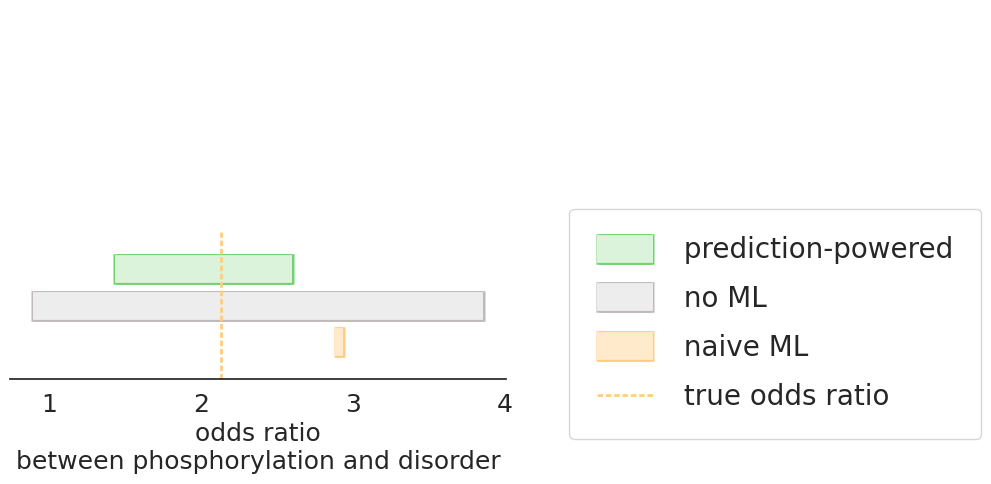

In [56]:
# example intervals for phosphorylation
ptm = 'p'
n = df.n.unique()[5]
tmp = df.loc[(df.ptm == ptm) & (df.n == n)]
cl_df = tmp[1::2]
pp_df = tmp[0::2]
trial = 54
save = True

# true odds ratio
n_z1_y1 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['disordered'] == 1)])
n_z0_y1 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['disordered'] == 1)])
n_z1_y0 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['ordered'] == 1)])
n_z0_y0 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['ordered'] == 1)])
theta_star = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)

# naive CI
alpha = 0.1
grid = np.arange(1e-3, 1, step=1e-3)
y_z1_n = (data_df.loc[data_df[ptm] == 1]['pred_disordered'].to_numpy() >= 0.5).astype(int)
y_z0_n = (data_df.loc[data_df[ptm] == 0]['pred_disordered'].to_numpy() >= 0.5).astype(int)
mu1_naive_ci = utils.wsr_iid(y_z1_n, alpha / 2, grid)
mu0_naive_ci = utils.wsr_iid(y_z0_n, alpha / 2, grid)
o_naive_ci = utils.get_odds_ratio_ci_from_mu_ci(mu1_naive_ci, mu0_naive_ci)

ci_pp = [pp_df.iloc[trial]['o-lower'], pp_df.iloc[trial]['o-upper']]
ci_cl = [cl_df.iloc[trial]['o-lower'], cl_df.iloc[trial]['o-upper']]

plt.figure(figsize=(6.4,4.8))
plt.plot(
    ci_pp,[0.3,0.3],
    linewidth=20, color="#DAF3DA", solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#71D26F"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#71D26F"),
        pe.Normal()
    ],
    label=' prediction-powered'
)
plt.plot(
    ci_cl, [0.2, 0.2],
    linewidth=20, color="#EEEDED",
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#BFB9B9"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#BFB9B9"),
        pe.Normal()
    ],
    label=' no ML'
)
plt.plot(
    o_naive_ci, [0.1, 0.1],
    linewidth=20, color="#FFEACC", 
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#FFCD82"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#FFCD82"),
        pe.Normal()
    ],
    label=' naive ML',  
)


plt.plot(
    [theta_star, theta_star], [0, 0.4], linestyle='--', dashes=(2, 1), linewidth=2,
    label=" true odds ratio", color="#FFCD82"
)

plt.xlabel("odds ratio\nbetween phosphorylation and disorder", fontsize=18)
plt.yticks([], labels=[])
plt.xticks(range(1, 5), fontsize=18)
plt.ylim([0,1])
leg = plt.legend(fontsize=20, borderpad=1, labelspacing = 0.75, bbox_to_anchor=[1.1,0.5])
sns.despine(ax=plt.gca(),top=True,right=True,left=True)

if save:
    plt.savefig('./figures/intervals-{}.pdf'.format(ptm), ppi=300, bbox_inches='tight')
plt.show()

/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6


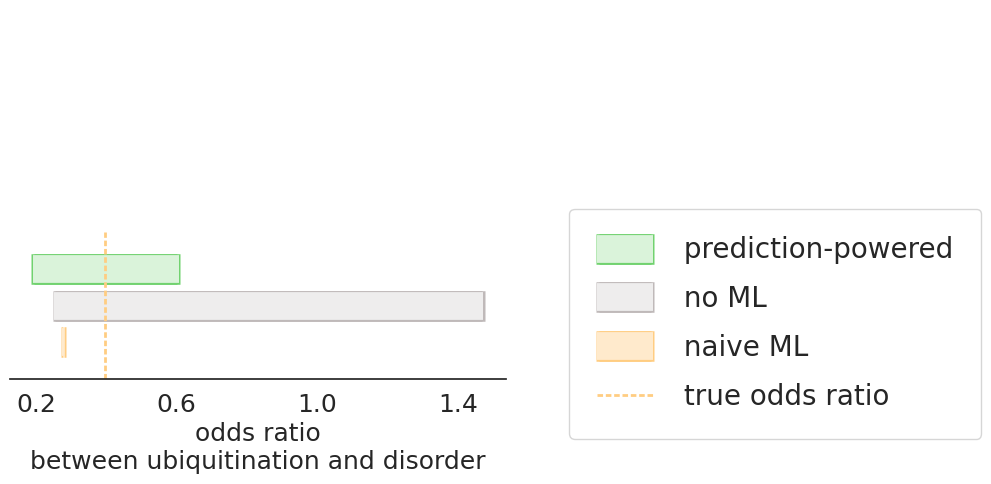

In [55]:
# example intervals for ubiquitination
ptm = 'ub'
n = df.n.unique()[5]
tmp = df.loc[(df.ptm == ptm) & (df.n == n)]
cl_df = tmp[1::2]
pp_df = tmp[0::2]
trial = 149
save = True

# true odds ratio
n_z1_y1 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['disordered'] == 1)])
n_z0_y1 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['disordered'] == 1)])
n_z1_y0 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['ordered'] == 1)])
n_z0_y0 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['ordered'] == 1)])
theta_star = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)

# naive CI
alpha = 0.1
grid = np.arange(1e-3, 1, step=1e-3)
y_z1_n = (data_df.loc[data_df[ptm] == 1]['pred_disordered'].to_numpy() >= 0.5).astype(int)
y_z0_n = (data_df.loc[data_df[ptm] == 0]['pred_disordered'].to_numpy() >= 0.5).astype(int)
mu1_naive_ci = utils.wsr_iid(y_z1_n, alpha / 2, grid)
mu0_naive_ci = utils.wsr_iid(y_z0_n, alpha / 2, grid)
o_naive_ci = utils.get_odds_ratio_ci_from_mu_ci(mu1_naive_ci, mu0_naive_ci)

ci_pp = [pp_df.iloc[trial]['o-lower'], pp_df.iloc[trial]['o-upper']]
ci_cl = [cl_df.iloc[trial]['o-lower'], cl_df.iloc[trial]['o-upper']]

plt.figure(figsize=(6.4,4.8))
plt.plot(
    ci_pp,[0.3,0.3],
    linewidth=20, color="#DAF3DA", solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#71D26F"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#71D26F"),
        pe.Normal()
    ],
    label=' prediction-powered'
)
plt.plot(
    ci_cl, [0.2, 0.2],
    linewidth=20, color="#EEEDED",
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#BFB9B9"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#BFB9B9"),
        pe.Normal()
    ],
    label=' no ML'
)
plt.plot(
    o_naive_ci, [0.1, 0.1],
    linewidth=20, color="#FFEACC", 
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#FFCD82"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#FFCD82"),
        pe.Normal()
    ],
    label=' naive ML',  
)


plt.plot(
    [theta_star, theta_star], [0, 0.4], linestyle='--', dashes=(2, 1), linewidth=2,
    label=" true odds ratio", color="#FFCD82"
)

plt.xlabel("odds ratio\nbetween ubiquitination and disorder", fontsize=18)
plt.yticks([], labels=[])
plt.xticks(np.arange(0.2, 1.5, 0.4), fontsize=18)
plt.ylim([0,1])
leg = plt.legend(fontsize=20, borderpad=1, labelspacing = 0.75, bbox_to_anchor=[1.1,0.5])
sns.despine(ax=plt.gca(),top=True,right=True,left=True)

if save:
    plt.savefig('./figures/intervals-{}.pdf'.format(ptm), ppi=300, bbox_inches='tight')
plt.show()